In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer

In [1]:
pip show scikit-learn joblib numpy

Name: scikit-learn
Version: 1.7.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: 
Location: C:\Users\asus-z\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
---
Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: C:\Users\asus-z\anaconda3\Lib\site-packages
Requires: 
Required-by: imbalanced-learn, nltk, scikit-learn
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the follow

In [2]:
df = pd.read_csv('Diamonds Prices2022.csv')

# Feature Engineering: Create volume feature
df['volume'] = df['x'] * df['y'] * df['z']

# Drop the 'Unnamed: 0' column as it's just an index
df = df.drop(['Unnamed: 0','depth','table'], axis=1)

print("Rows with duplicates:")
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
print(duplicates)

Rows with duplicates:
       carat        cut color clarity  price     x     y     z      volume
398     0.30    Premium     H     SI1    554  4.28  4.24  2.68   48.634496
1005    0.79      Ideal     G     SI1   2898  5.90  5.85  3.66  126.324900
1006    0.79      Ideal     G     SI1   2898  5.90  5.85  3.66  126.324900
1007    0.79      Ideal     G     SI1   2898  5.90  5.85  3.66  126.324900
1008    0.79      Ideal     G     SI1   2898  5.90  5.85  3.66  126.324900
...      ...        ...   ...     ...    ...   ...   ...   ...         ...
52861   0.50       Fair     E     VS2   2579  5.21  5.18  4.09  110.380102
53637   0.30  Very Good     D     SI1    552  4.26  4.28  2.67   48.681576
53940   0.71    Premium     E     SI1   2756  5.79  5.74  3.49  115.988754
53941   0.71    Premium     F     SI1   2756  5.74  5.73  3.43  112.813386
53942   0.70  Very Good     E     VS2   2757  5.71  5.76  3.47  114.126912

[299 rows x 9 columns]


In [3]:
# Check for rows where x, y, or z are zero (which would result in volume 0)
zero_dimensions = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
if not zero_dimensions.empty:
    print("Rows with zero dimensions (x, y, or z):")
    display(zero_dimensions)
    # Remove rows with zero dimensions
    df = df.drop(zero_dimensions.index)


Rows with zero dimensions (x, y, or z):


,carat,cut,color,clarity,price,x,y,z,volume
2207,1.00,Premium,G,SI2,3142,6.55,6.48,0.0,0.0
2314,1.01,Premium,H,I1,3167,6.66,6.60,0.0,0.0
4791,1.10,Premium,G,SI2,3696,6.50,6.47,0.0,0.0
5471,1.01,Premium,F,SI2,3837,6.50,6.47,0.0,0.0
10167,1.50,Good,G,I1,4731,7.15,7.04,0.0,0.0
11182,1.07,Ideal,F,SI2,4954,0.00,6.62,0.0,0.0
11963,1.00,Very Good,H,VS2,5139,0.00,0.00,0.0,0.0
13601,1.15,Ideal,G,VS2,5564,6.88,6.83,0.0,0.0
15951,1.14,Fair,G,VS1,6381,0.00,0.00,0.0,0.0
24394,2.18,Premium,H,SI2,12631,8.49,8.45,0.0,0.0


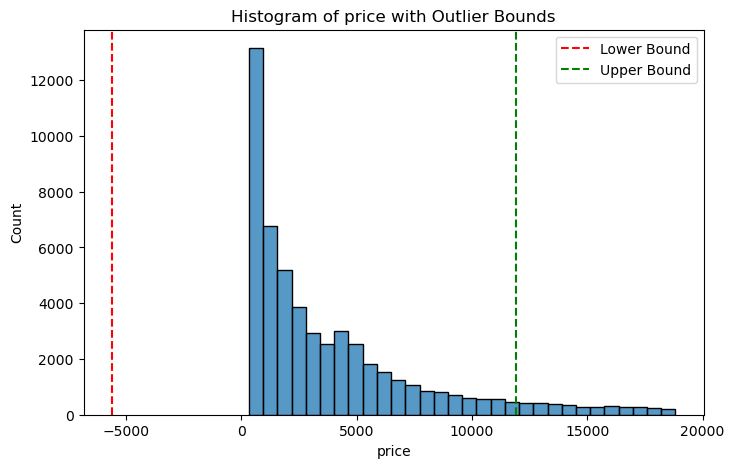

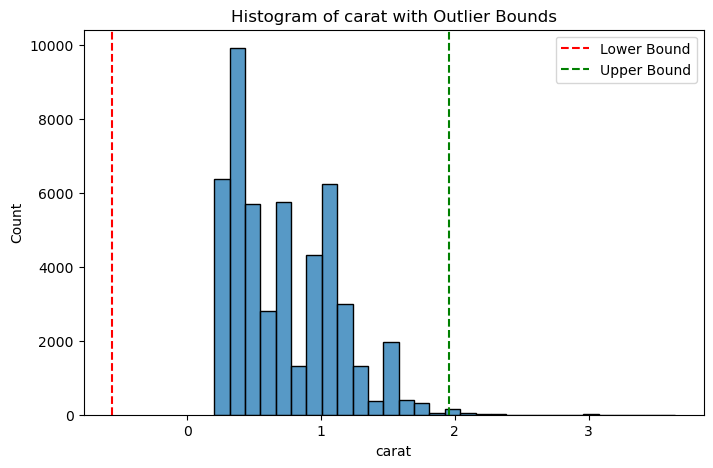

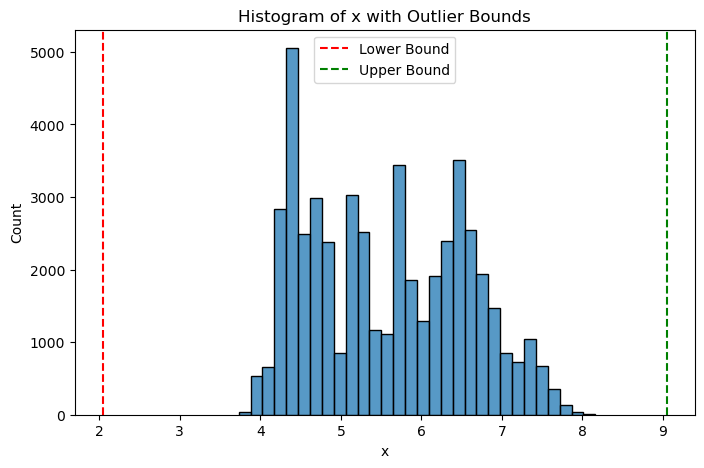

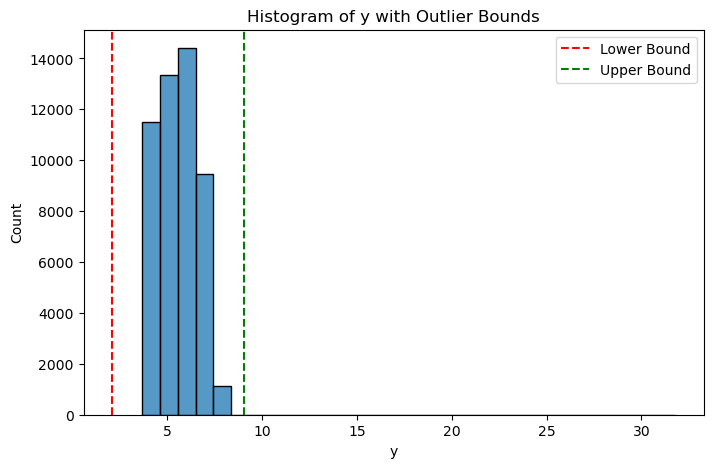

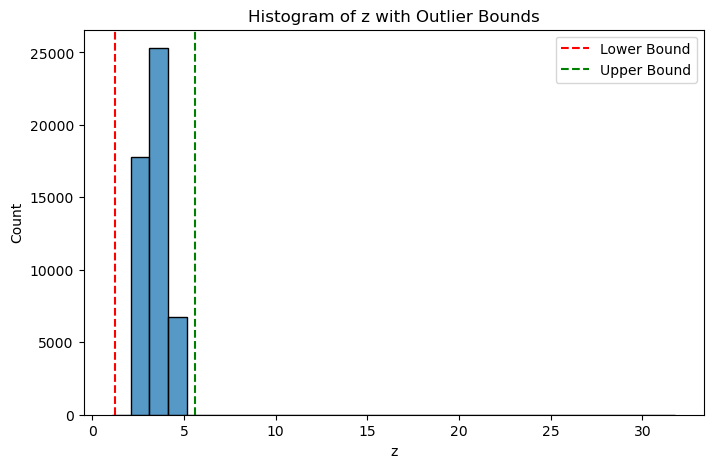

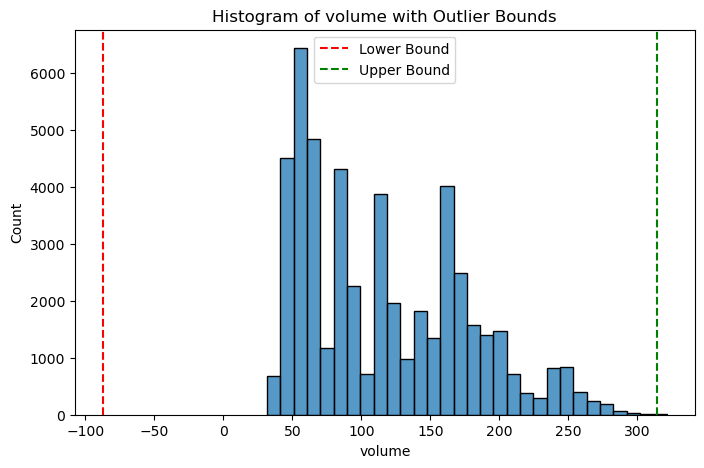

In [4]:
# Outlier Removal using IQR
numerical_cols_for_outlier = ['price','carat','x', 'y', 'z', 'volume']

for col in numerical_cols_for_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30)
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Histogram of {col} with Outlier Bounds')
    plt.legend()
    plt.show()
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  

In [5]:
# Define features (X) and target (y)
X = df.drop(['price'], axis=1)
y = df['price']

# Identify categorical and numerical features
categorical_features = ['cut', 'color', 'clarity']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features] # Ensure no overlap

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
       
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)


In [6]:
high_price_mask = y_train > 5000
print(f"High price samples (>$5000): {high_price_mask.sum()}/{len(y_train)} ({high_price_mask.sum()/len(y_train):.1%})")

very_high_price_mask = y_train > 10000
print(f"Very high price samples (>$10000): {very_high_price_mask.sum()}/{len(y_train)} ({very_high_price_mask.sum()/len(y_train):.1%})")

High price samples (>$5000): 8712/39867 (21.9%)
Very high price samples (>$10000): 1236/39867 (3.1%)


In [7]:
weights = np.ones_like(y_train) # Initial weights are all 1
quantiles = np.quantile(y_train, [0.75, 0.969])

weights[y_train > quantiles[0]] = 2 # Samples with prices above the 70th percentile are weighted 2x
weights[y_train > quantiles[1]] = 4 # Samples with prices above the 90th percentile are weighted 4x

sample_weights = weights

In [8]:
# Check if the weights are actually applied
print("Sample weights stats:")
print(f"Mean weight: {sample_weights.mean():.3f}")
print(f"Max weight: {sample_weights.max():.3f}")
print(f"Min weight: {sample_weights.min():.3f}")
print(f"Number of weighted samples: {(sample_weights > 1).sum()}/{len(sample_weights)}")

Sample weights stats:
Mean weight: 1.312
Max weight: 4.000
Min weight: 1.000
Number of weighted samples: 9964/39867


In [9]:
from sklearn.linear_model import LinearRegression
# Create a pipeline with the preprocessor and a Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train_log,regressor__sample_weight=sample_weights)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
X_train.info

<bound method DataFrame.info of        carat        cut color clarity     x     y     z      volume
7221    0.89      Ideal     D     SI2  6.22  6.25  3.79  147.336250
37209   0.34      Ideal     G      IF  4.50  4.52  2.79   56.748600
939     0.90       Fair     D     SI2  6.02  5.90  3.99  141.716820
37801   0.51      Ideal     I     SI1  5.18  5.19  3.20   86.029440
35758   0.41  Very Good     D     VS2  4.78  4.82  2.98   68.658008
...      ...        ...   ...     ...   ...   ...   ...         ...
11328   1.20    Premium     I     SI2  6.91  6.93  4.15  198.728145
48827   0.71    Premium     H     SI2  5.70  5.64  3.54  113.803920
42224   0.52      Ideal     E     SI2  5.12  5.08  3.21   83.490816
861     0.75      Ideal     I     SI1  5.83  5.85  3.61  123.120855
15878   1.26      Ideal     I     VS2  6.96  6.91  4.34  208.726224

[39867 rows x 8 columns]>

In [10]:

# Make predictions on the test data
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Root Mean Squared Error (RMSE): 489.37
R-squared (R2): 0.97
Mean Absolute Percentage Error(MAPE):0.10


## random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with the preprocessor and a RandomForestRegressor model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=200,    
                                                                max_depth=None,        
                                                                min_samples_split=5,
                                                                min_samples_leaf=2,
                                                                random_state=42,
                                                                n_jobs=-1))])

# Train the model
rf_model.fit(X_train, y_train_log,regressor__sample_weight=sample_weights)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# Make predictions on the test data using the trained Random Forest model

y_pred_rf_log = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model RMSE: {rmse_rf:.2f}')
print(f'Random Forest Model R-squared (R2): {r2_rf:.4f}')

Random Forest Model RMSE: 372.15
Random Forest Model R-squared (R2): 0.9813


## gradientboosting


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline with the preprocessor and a GradientBoostingRegressor model
gbr_model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', GradientBoostingRegressor(
        loss='huber',              # Huber loss is more robust to outliers
        n_estimators=2000,         # More trees
        learning_rate=0.02,        # Smaller learning rate
        max_depth=7,               # Slightly deeper trees
        min_samples_split=10,      # Prevent overfitting
        min_samples_leaf=4,
        subsample=0.8,             # Stochastic GBR
        max_features='sqrt',       # Feature sampling
        alpha=0.95,                # Alpha for Huber loss
        random_state=42,
        validation_fraction=0.1,   # Early stopping validation
        n_iter_no_change=50
)
)])

# Train the model
gbr_model.fit(X_train, y_train_log,regressor__sample_weight=sample_weights)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
# Make predictions on the test data using the trained Gradient Boosting model
y_pred_gbr_log = gbr_model.predict(X_test)
y_pred_gbr = np.expm1(y_pred_gbr_log)

# Evaluate the Gradient Boosting model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mape =mean_absolute_percentage_error(y_test, y_pred_rf)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Model RMSE: {rmse_gbr:.2f}')
print(f'Gradient Boosting Model R-squared (R2): {r2_gbr:.4f}')
print(f'Mean Absolute Percentage Error(MAPE):{mape:.2f}')

Gradient Boosting Model RMSE: 372.68
Gradient Boosting Model R-squared (R2): 0.9812
Mean Absolute Percentage Error(MAPE):0.06


## SVM(SVR)

In [17]:
from sklearn.svm import SVR

# Create a pipeline with the preprocessor and an SVR model
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', SVR())])

# Train the model
svr_model.fit(X_train, y_train_log)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
# Make predictions on the test data using the trained SVR model
y_pred_svr_log = svr_model.predict(X_test)
y_pred_svr = np.expm1(y_pred_svr_log)
# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Support Vector Regression Model RMSE: {rmse_svr:.2f}')
print(f'Support Vector Regression Model R-squared (R2): {r2_svr:.2f}')

Support Vector Regression Model RMSE: 710.53
Support Vector Regression Model R-squared (R2): 0.93


## Model Comparison

In [19]:
print("--- Model Comparison ---")
print(f"Linear Regression RMSE: {rmse:.4f}")
print(f"Linear Regression R-squared (R2): {r2:.4f}")
print(f"Random Forest Model RMSE: {rmse_rf:.4f}")
print(f"Random Forest Model R-squared (R2): {r2_rf:.4f}")
print(f"Gradient Boosting Model RMSE: {rmse_gbr:.4f}")
print(f"Gradient Boosting Model R-squared (R2): {r2_gbr:.4f}")
print(f"Support Vector Regression Model RMSE: {rmse_svr:.4f}")
print(f"Support Vector Regression Model R-squared (R2): {r2_svr:.4f}")

--- Model Comparison ---
Linear Regression RMSE: 489.3675
Linear Regression R-squared (R2): 0.9676
Random Forest Model RMSE: 372.1542
Random Forest Model R-squared (R2): 0.9813
Gradient Boosting Model RMSE: 372.6796
Gradient Boosting Model R-squared (R2): 0.9812
Support Vector Regression Model RMSE: 710.5276
Support Vector Regression Model R-squared (R2): 0.9317


In [28]:
import joblib

joblib.dump(rf_model, 'best_diamond_price_model.joblib')


['best_diamond_price_model.joblib']

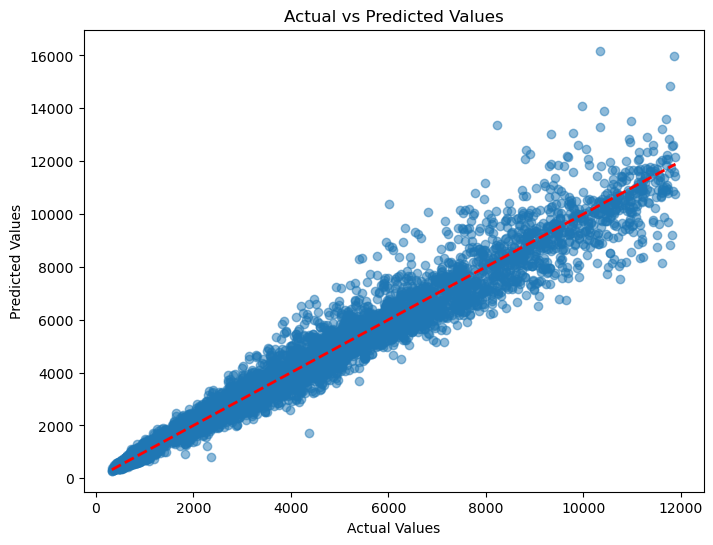

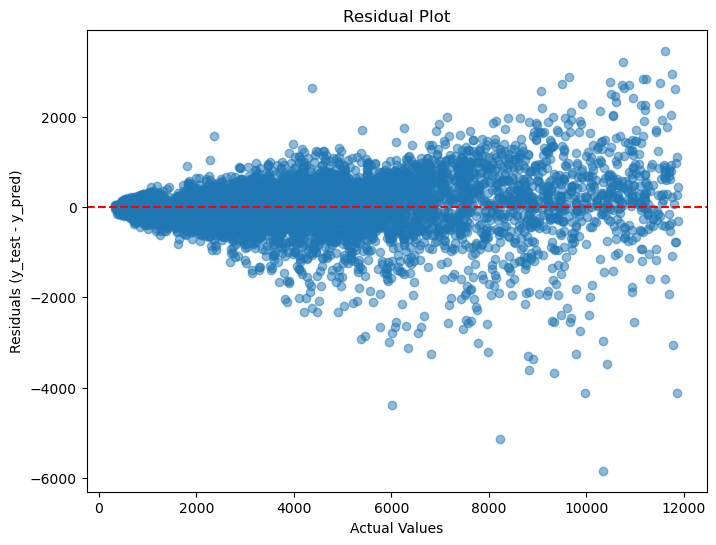

Text(0, 0.5, 'Frequency')

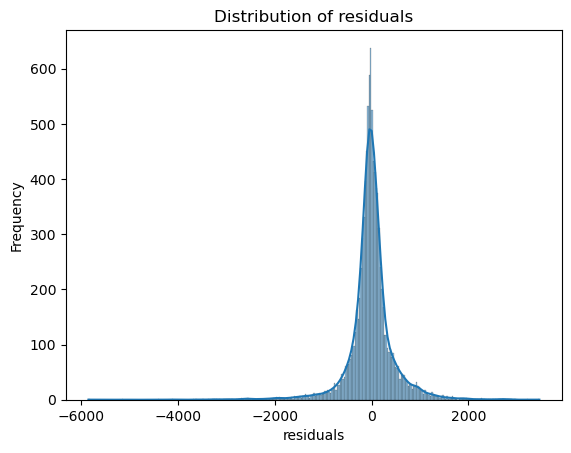

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals')
plt.xlabel('residuals')
plt.ylabel('Frequency')

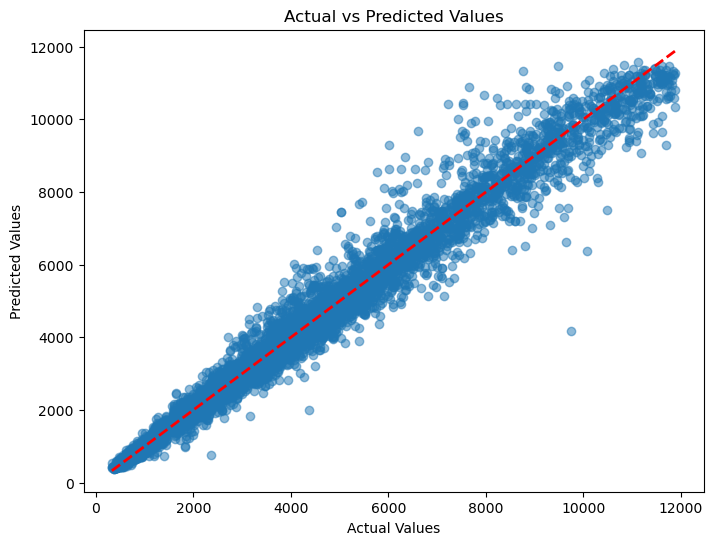

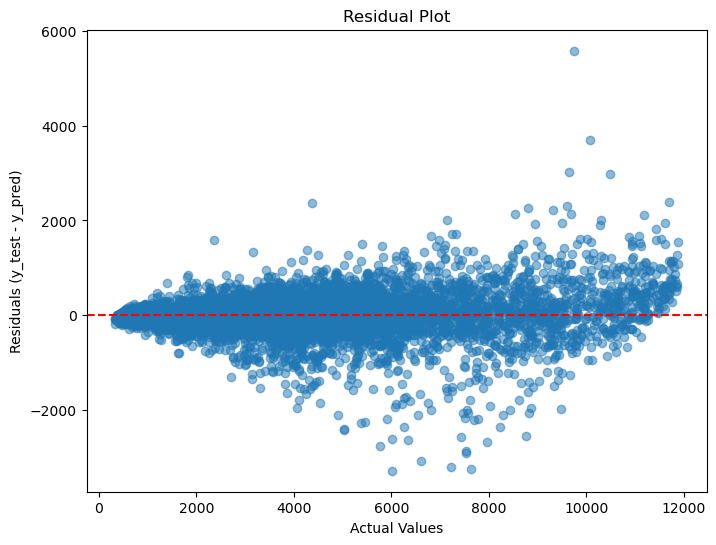

Text(0, 0.5, 'Frequency')

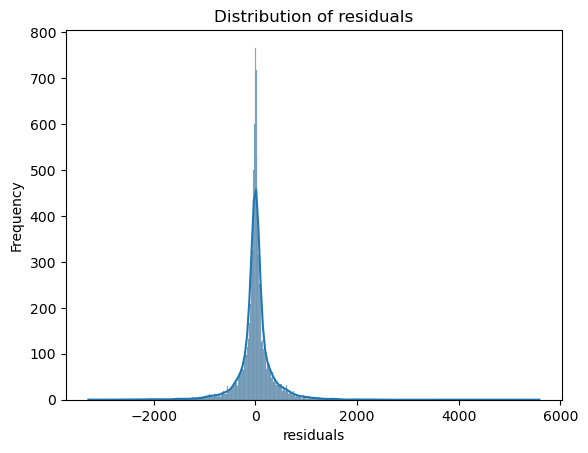

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - y_pred_rf
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals')
plt.xlabel('residuals')
plt.ylabel('Frequency')

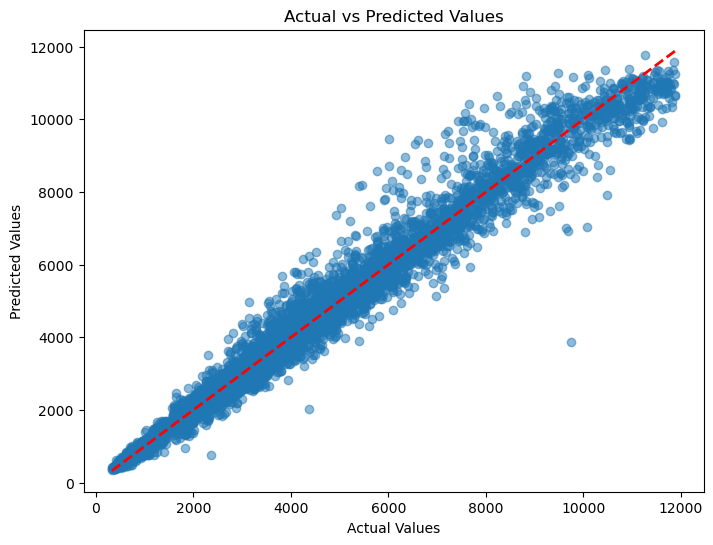

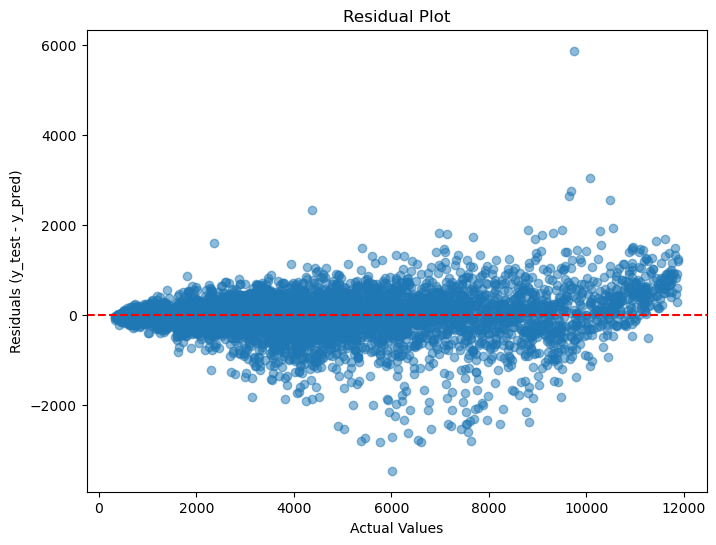

Text(0, 0.5, 'Frequency')

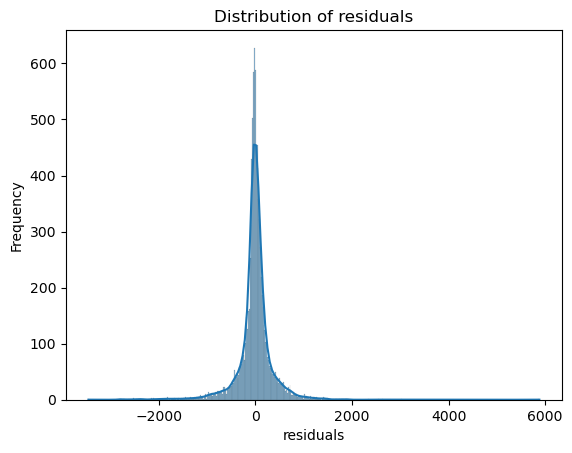

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - y_pred_gbr
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.show()


sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals')
plt.xlabel('residuals')
plt.ylabel('Frequency')

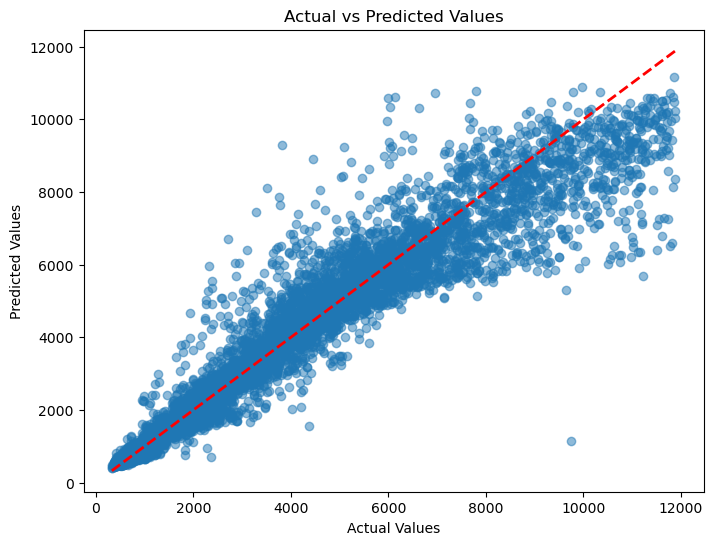

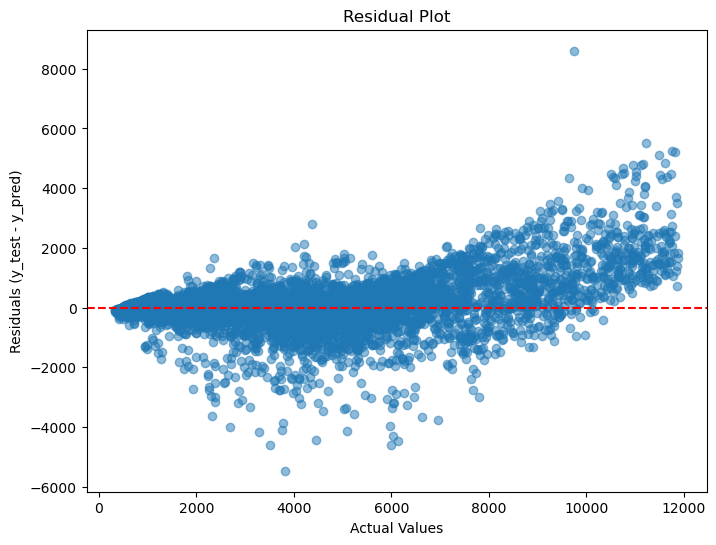

Text(0, 0.5, 'Frequency')

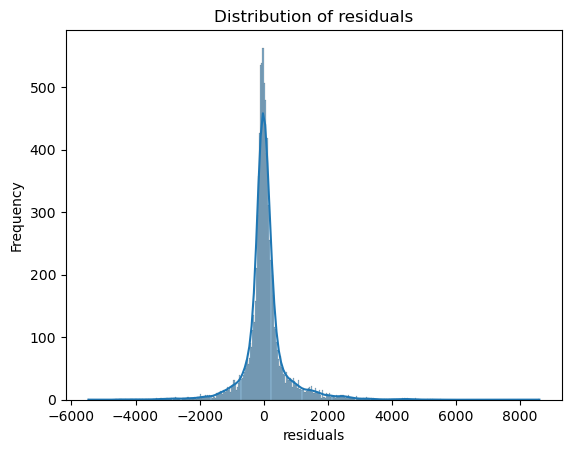

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - y_pred_svr
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.show()


sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals')
plt.xlabel('residuals')
plt.ylabel('Frequency')